# Read OpendTect horizons

The best way to export horizons from OpendTect is with these options:

- x/y and inline/crossline
- with header (single or multi-line, it doesn't matter)
- choose all the attributes you want

On the last point, if you choose multiple horizons in one file, you can only have one attribute in the file. 

## IL/XL only, single-line header, multiple attributes

In [1]:
import gio

ds = gio.read_odt('../data/OdT/3d_horizon/Segment_ILXL_Single-line-header.dat')
ds

<xarray.Dataset>
Dimensions:         (iline: 54, xline: 57)
Coordinates:
  * iline           (iline) int64 376 378 380 382 384 ... 474 476 478 480 482
  * xline           (xline) int64 812 814 816 818 820 ... 916 918 920 922 924
Data variables:
    twt             (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    amplitude       (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    correlation     (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    seed_index      (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    tracking_order  (iline, xline) float64 nan nan nan nan ... nan nan nan nan

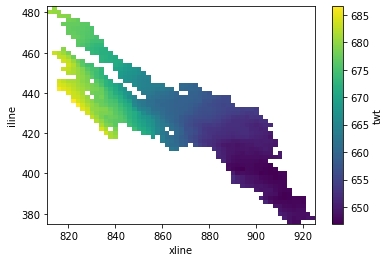

In [2]:
ds['twt'].plot()

## IL/XL and XY, multi-line header, multiple attributes

### Load everything (default)

X and Y are loaded as `cdp_x` and `cdp_y`, to be consistent with [the **`seisnc`** standard](https://segysak.readthedocs.io/en/latest/seisnc-standard.html) in [`segysak`](https://segysak.readthedocs.io/en/latest/index.html).

In [3]:
ds = gio.read_odt('../data/OdT/3d_horizon/Segment_XY-and-ILXL_Multi-line-header.dat')
ds

<xarray.Dataset>
Dimensions:         (iline: 54, xline: 57)
Coordinates:
  * iline           (iline) int64 376 378 380 382 384 ... 474 476 478 480 482
  * xline           (xline) int64 812 814 816 818 820 ... 916 918 920 922 924
    cdp_x           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    cdp_y           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
Data variables:
    twt             (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    amplitude       (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    correlation     (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    seed_index      (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    tracking_order  (iline, xline) float64 nan nan nan nan ... nan nan nan nan

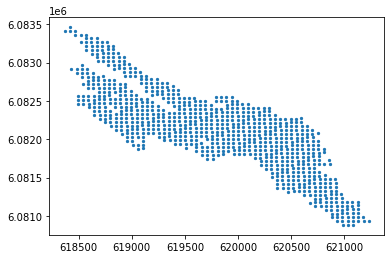

In [4]:
import matplotlib.pyplot as plt

plt.scatter(ds.coords['cdp_x'], ds.coords['cdp_y'], s=5)

### Load only inline, crossline, TWT

In [5]:
fname = '../data/OdT/3d_horizon/Segment_XY-and-ILXL_Multi-line-header.dat'
names = ['Inline', 'Crossline', 'Z']  # Must match OdT DAT file.

ds = gio.read_odt(fname, names=names)
ds

<xarray.Dataset>
Dimensions:  (iline: 54, xline: 57)
Coordinates:
  * iline    (iline) int64 376 378 380 382 384 386 ... 472 474 476 478 480 482
  * xline    (xline) int64 812 814 816 818 820 822 ... 914 916 918 920 922 924
Data variables:
    twt      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan

## XY only

If you have a file with no IL/XL, `gio` can try to load data using only X and Y:

- If there's a header you can load any number of attributes.
- If there's no header, you can only one attribute (e.g. TWT) automagically...
- OR, if there's no header, you can provide `names` to tell `gio` what everything is.

`gio` must create fake inline and crossline numbers; you can provide an origin and a step size. For example, notice above that the true inline and crossline numbers are:

- inline: 376, 378, 380, etc.
- crossline: 812, 814, 816, etc.

So we can pass an origin of `(376, 812)` and a step of `(2, 2)` to mimic these.

### Header present

In [6]:
fname = '../data/OdT/3d_horizon/Segment_XY_Single-line-header.dat'

ds = gio.read_odt(fname, origin=(376, 812), step=(2, 2))
ds

<xarray.Dataset>
Dimensions:         (iline: 54, xline: 57)
Coordinates:
  * iline           (iline) int64 376 378 380 382 384 ... 474 476 478 480 482
  * xline           (xline) int64 812 814 816 818 820 ... 916 918 920 922 924
    cdp_x           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    cdp_y           (iline, xline) float64 nan nan nan nan ... nan nan nan nan
Data variables:
    twt             (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    amplitude       (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    correlation     (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    seed_index      (iline, xline) float64 nan nan nan nan ... nan nan nan nan
    tracking_order  (iline, xline) float64 nan nan nan nan ... nan nan nan nan

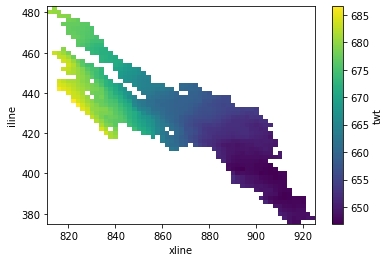

In [8]:
ds['twt'].plot()

### No header, more than one attribute: raises an error

In [9]:
fname = '../data/OdT/3d_horizon/Segment_XY_No-header.dat'

ds = gio.read_odt(fname)
ds

# Raises an error:

TypeError: First two columns must be integers to be interpreted as inline and crossline.

In [10]:
fname = '../data/OdT/3d_horizon/Segment_XY_No-header.dat'

ds = gio.read_odt(fname, names=['X', 'Y', 'TWT'])
ds

<xarray.Dataset>
Dimensions:  (iline: 54, xline: 57)
Coordinates:
  * iline    (iline) int64 0 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52 53
  * xline    (xline) int64 0 1 2 3 4 5 6 7 8 9 ... 47 48 49 50 51 52 53 54 55 56
    cdp_x    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_y    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    twt      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan

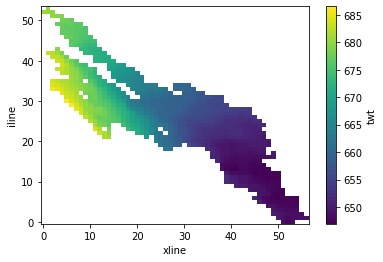

In [11]:
ds['twt'].plot()

## Multiple horizons in one file

You can export multiple horizons from OpendTect. These will be loaded as one `xarray.Dataset` as different **Data variables**. (The actual attribute you exported from OdT is always called Z; this information is not retained in the xarray.)

## Undefined values

These are exported as `'1e30'` by default. You can override this (not add to it, which is the default `pandas` behaviour) by passing one or more `na_values`.

In [18]:
fname = '../data/OdT/3d_horizon/Segment_XY_No-header_NULLs.dat'

ds = gio.read_odt(fname, names=['X', 'Y', 'TWT'])
ds

<xarray.Dataset>
Dimensions:  (iline: 54, xline: 57)
Coordinates:
  * iline    (iline) int64 0 1 2 3 4 5 6 7 8 9 ... 44 45 46 47 48 49 50 51 52 53
  * xline    (xline) int64 0 1 2 3 4 5 6 7 8 9 ... 47 48 49 50 51 52 53 54 55 56
    cdp_x    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
    cdp_y    (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    twt      (iline, xline) float64 nan nan nan nan nan ... nan nan nan nan nan

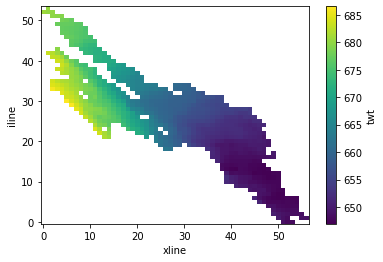

In [19]:
ds['twt'].plot()